In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [78]:
df=pd.read_csv("framingham.csv")

In [79]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [80]:
df.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [81]:
df.dropna(inplace=True)

In [82]:
df.drop(columns=['cigsPerDay', 'diaBP', 'diabetes'], inplace=True)

In [83]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
totChol            0
sysBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [84]:
df.duplicated().sum()

0

In [85]:
x=df.drop('TenYearCHD', axis=1)
y=df['TenYearCHD']

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [87]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Richee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
y_pred=model.predict(x_test)

In [89]:
df.head()


,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,1.0,1,0.0,0,0,245.0,127.5,25.34,75.0,70.0,0
3,0,61,3.0,1,0.0,0,1,225.0,150.0,28.58,65.0,103.0,1
4,0,46,3.0,1,0.0,0,0,285.0,130.0,23.10,85.0,85.0,0


In [90]:
model.predict([[1,39,4,0,0,0,0,195,106,26.97,80,77]])

C:\Users\Richee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

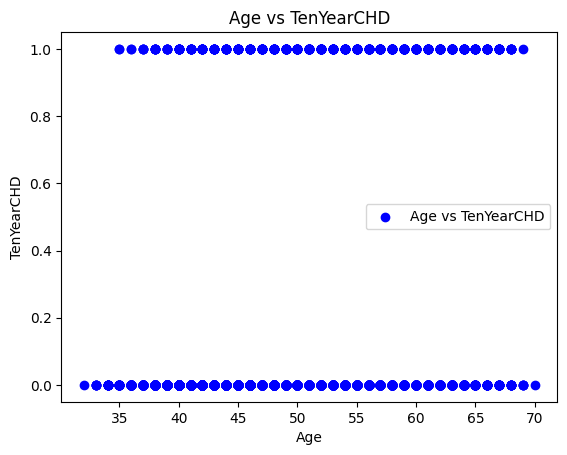

In [91]:
plt.scatter(x['age'], y, color='blue', label='Age vs TenYearCHD')
plt.xlabel('Age')
plt.ylabel('TenYearCHD')
plt.title('Age vs TenYearCHD')
plt.legend()
plt.show()

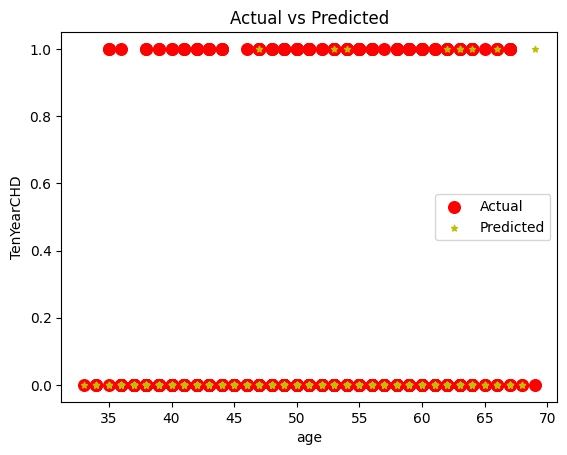

In [97]:
plt.scatter(x_test['age'], y_test, color='red', label='Actual',s=70)
plt.scatter(x_test['age'], y_pred, color='y', label='Predicted',marker='*', s=20)
plt.xlabel('age')
plt.ylabel('TenYearCHD')
plt.title('Actual vs Predicted')
plt.legend()


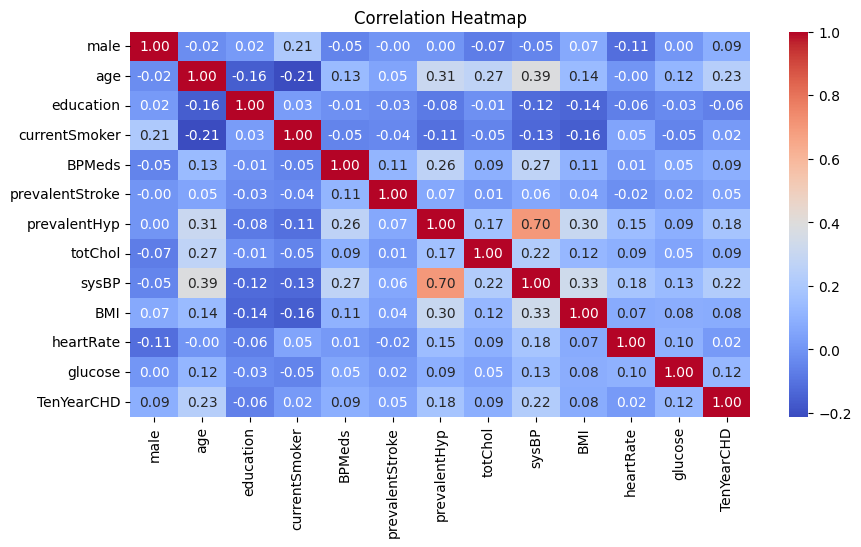

In [93]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


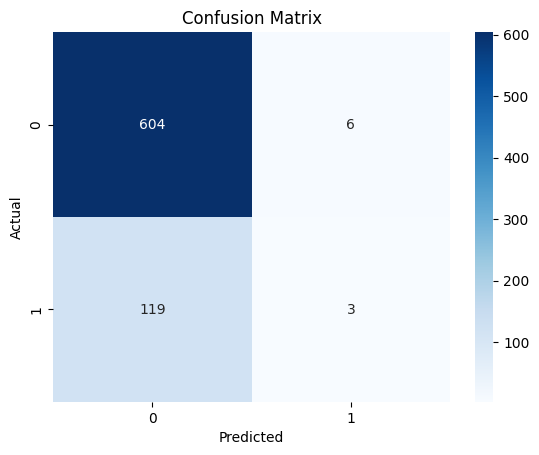

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

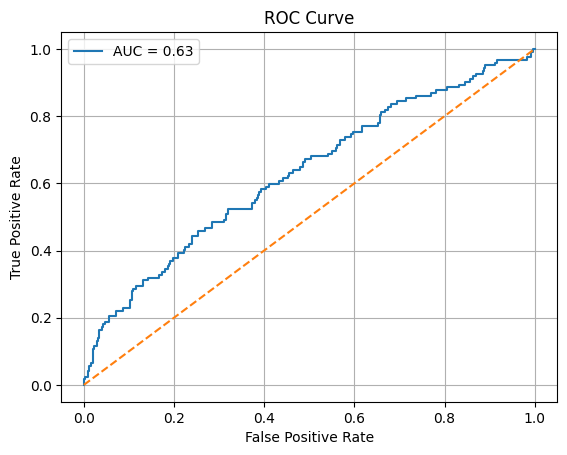

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


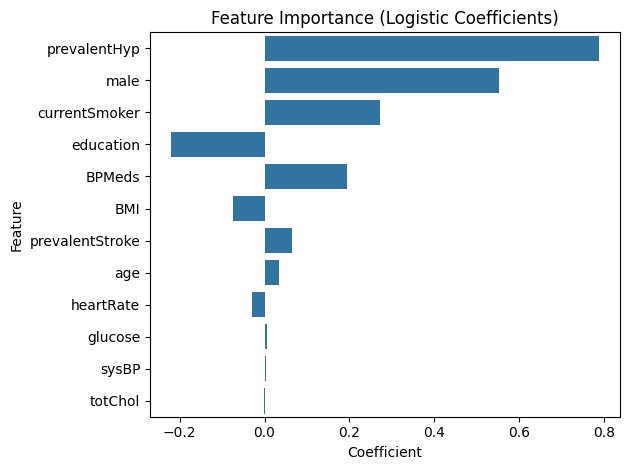

In [103]:
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Logistic Coefficients)')
plt.tight_layout()
plt.show()


In [99]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8292349726775956

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.33      0.02      0.05       122

    accuracy                           0.83       732
   macro avg       0.58      0.51      0.48       732
weighted avg       0.75      0.83      0.76       732

